In [1]:
import numpy as np
import gpflow
import math
import scipy
from scipy.special import sph_harm, lpmv, factorial
from scipy.special import gamma
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from graph_matern.kernels.graph_matern_kernel import GraphMaternKernel

import networkx as nx
from scipy import sparse
import tensorflow as tf
import tensorflow_probability as tfp
from tqdm.notebook import trange

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from model.model import GraphGP

dtype = tf.float64

In [2]:
def dist(x,y):
    return np.sqrt(((x-y)**2).sum(axis=-1))

def sample_on_sphere(samp_size=1000,dim=3): 
    mu = np.zeros(dim)
    cov_m = np.eye(dim)
    samp = np.random.multivariate_normal(mu, cov_m, samp_size)

    stretches = 1/dist(mu,samp).reshape(-1,1)
    samp*=stretches

    return samp

# Spherical harmonic in 3D

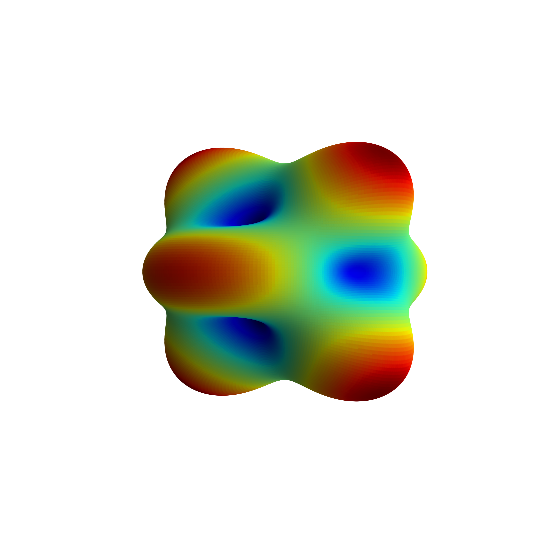

In [53]:
plot_harmonic_3D(4,2)

In [54]:
# Build sphere
sphere = sample_on_sphere()

#Build ys
x,y,z = sphere[:,0], sphere[:,1], sphere[:,2]
thetas = np.arctan(np.sqrt(x**2 + y**2)/z)
phis = np.arctan(y/x)
n = 4
k = 2
Y42 = sph_harm(k, n, phis, thetas)
ys = np.real(Y42)+1+np.random.normal(0,0.1,size=len(sphere))

In [55]:
train_size = 500
train_ind = np.random.choice(len(sphere), train_size, replace=False)

In [56]:
model = GraphGPR(k_neig=40,
                epsilon=0.25,
                num_eigenpairs=1000)

mean, cov = model.fit_and_predict(sphere,train_ind,ys[train_ind], full_cov=True)

Number of features is greater than number of vertices. Number of features will be reduced.


  0%|          | 0/999 [00:00<?, ?it/s]

In [57]:
test_ind = np.array(list(set(np.arange(len(sphere)))-set(train_ind)))
lik = model.LL(mean,cov,ys[test_ind])
print("R2 score is", r2_score(ys[test_ind],mean))
print("Likelihood is", lik)

R2 score is 0.7676744940128502
Likelihood is 411.9752135312334


# Spherical distance to North Pole

In [58]:
sphere = sample_on_sphere()

#Build ys
ys = np.arccos(sphere[:,-1])+1+np.random.normal(0,0.1,size=len(sphere))

In [59]:
train_size = 500
train_ind = np.random.choice(len(sphere), train_size, replace=False)

In [60]:
model = GraphGPR(k_neig=40,
                epsilon=0.25,
                num_eigenpairs=1000)

mean, cov = model.fit_and_predict(sphere,train_ind,ys[train_ind], full_cov=True)

Number of features is greater than number of vertices. Number of features will be reduced.


  0%|          | 0/999 [00:00<?, ?it/s]

In [61]:
test_ind = np.array(list(set(np.arange(len(sphere)))-set(train_ind)))
lik = model.LL(mean,cov,ys[test_ind])
print("R2 score is", r2_score(ys[test_ind],mean))
print("Likelihood is", lik)

R2 score is 0.974164048690754
Likelihood is 398.1710609075733


# Spherical distance to North Pole in high dimention

In [62]:
sphere = sample_on_sphere(samp_size=5000, dim=7)

#Build ys
ys = np.arccos(sphere[:,-1])+1+np.random.normal(0,0.1,size=len(sphere))

In [63]:
train_size = 1000
train_ind = np.random.choice(len(sphere), train_size, replace=False)

In [64]:
model = GraphGPR(k_neig=40,
                epsilon=0.25,
                num_eigenpairs=1000)

mean, cov = model.fit_and_predict(sphere,train_ind,ys[train_ind], full_cov=True)

  0%|          | 0/999 [00:00<?, ?it/s]

In [65]:
test_ind = np.array(list(set(np.arange(len(sphere)))-set(train_ind)))
lik = model.LL(mean,cov,ys[test_ind])
print("R2 score is", r2_score(ys[test_ind],mean))
print("Likelihood is", lik)

R2 score is 0.9275500443747626
Likelihood is 3137.9025940959873
